# 2-Dimension 4-Direction 200-individu



In [4]:
import numpy
import random as rd
import matplotlib.pyplot as plt
from matplotlib import animation
from random import randint
import time
from IPython.display import HTML
from os.path import exists
#from google.colab import files

In [6]:
def visual(x1,x2,x3,y1,y2,y3, n_i,n_r,sem, inf,day):
  x = (x1, x2, x3)
  y = (y1, y2, y3)
  colors = ("blue","red", "green")
  groups = ("healthy","infected", "recovered")
  markers = ("o","+", "x")
  sizes = (10,100,40)
  # Create plot
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(1, 1,1)
  plt.grid


  for x,y, color, group, markers, sizes in zip(x,y, colors, groups, markers, sizes):
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors=color, s=sizes, label=group,
               marker=markers )

  if day == 1:
    plt.title('(Day-'+str(day)+')     Infected = '+str(n_i-inf))
  elif day>1:
    plt.title('(Day-'+str(day)+')     Infected = '+str(n_i-inf)+'  (+'+str(inf)+')'+
              '     Recovered = '+str(n_r)+'  (+'+str(sem)+')')

  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

  plt.show()
  if exists('plot.png') and (day!=1):
      t = time.time()
      fig.savefig('plot{}.png'.format(int(day)))
#       files.download('plot{}.png'.format(int(day)))
      
  else:
      fig.savefig('plot.png')
#       files.download('plot.png')


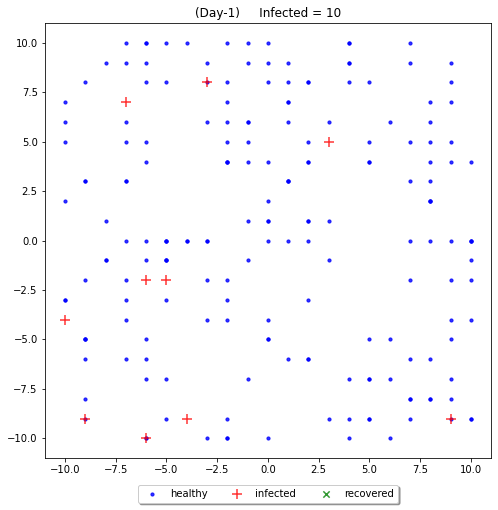

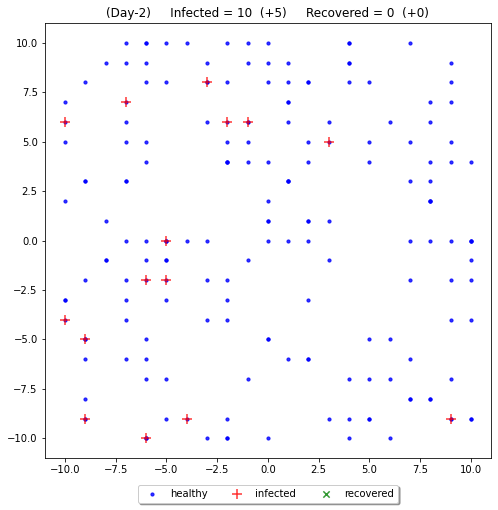

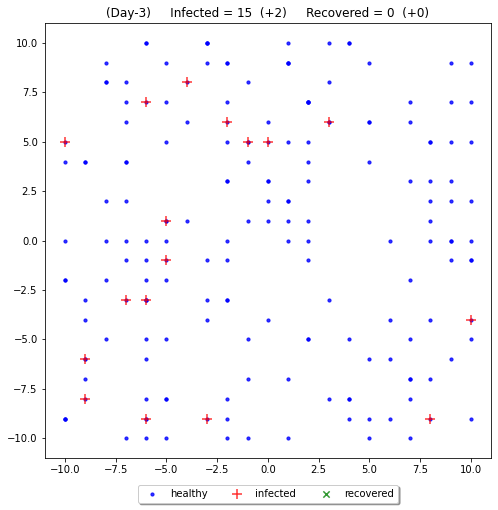

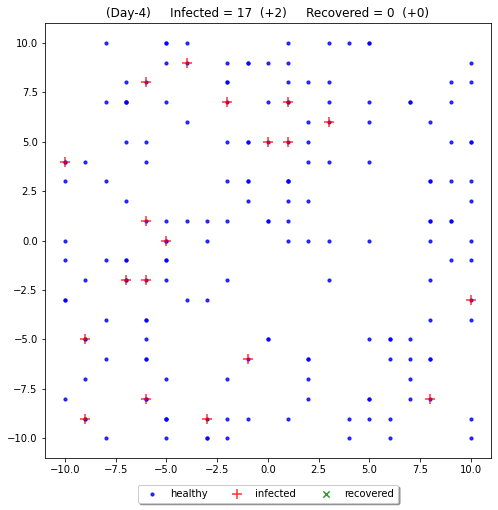

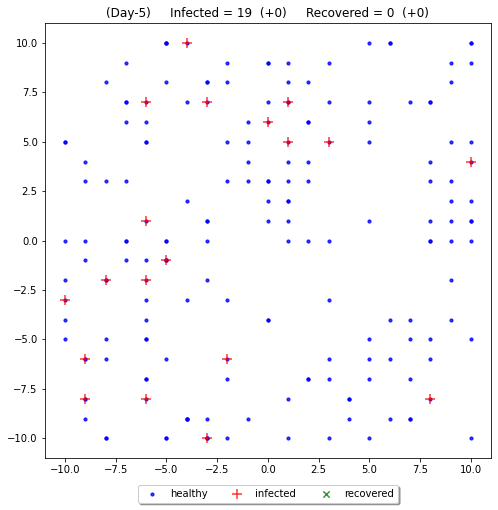

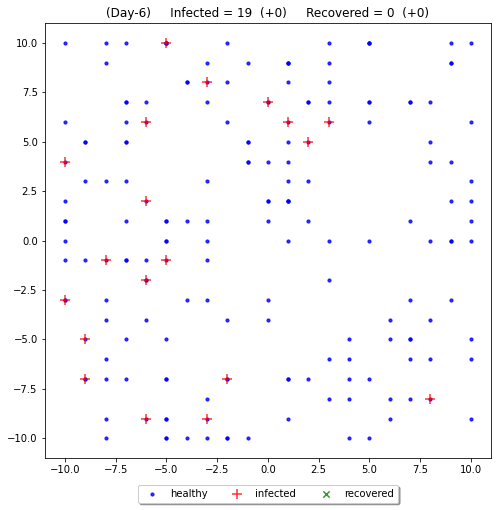

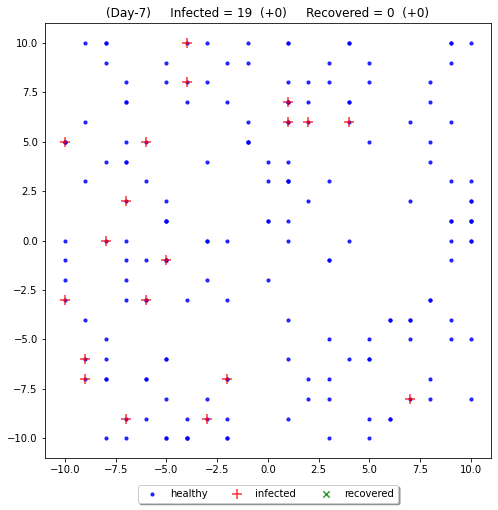

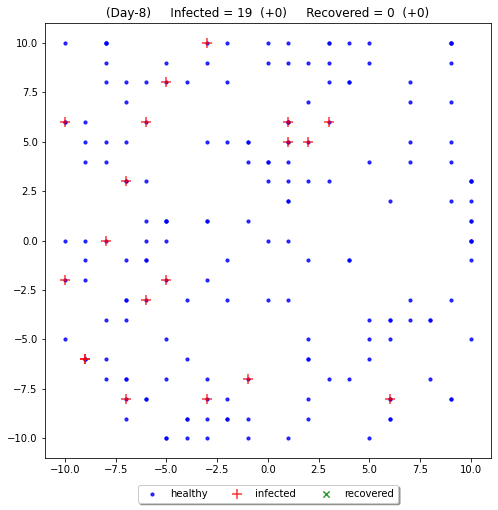

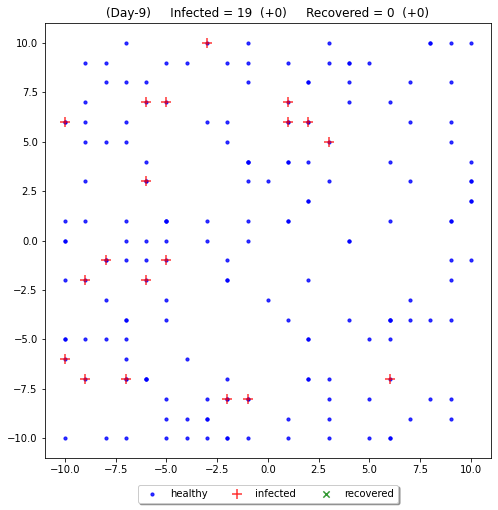

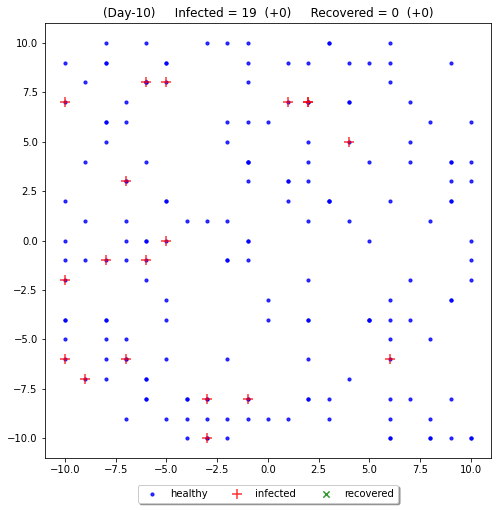

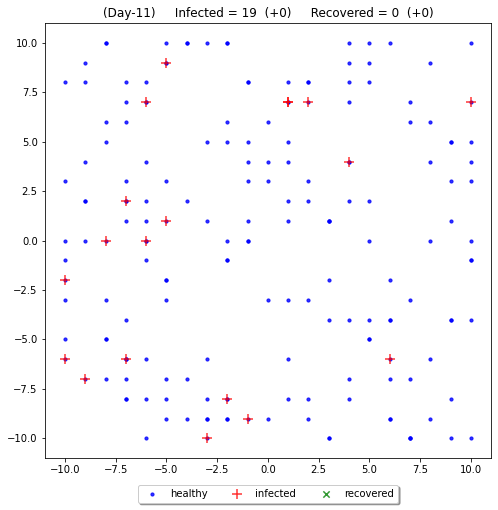

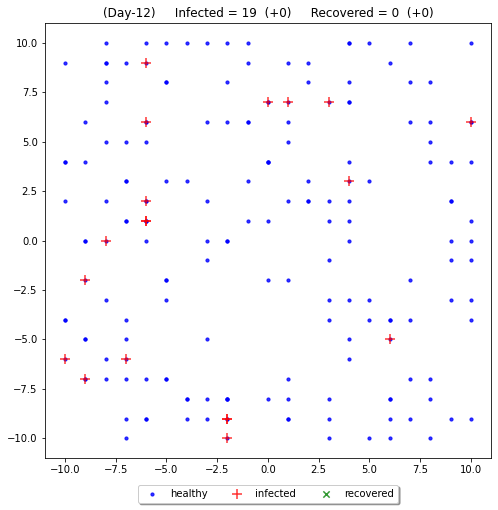

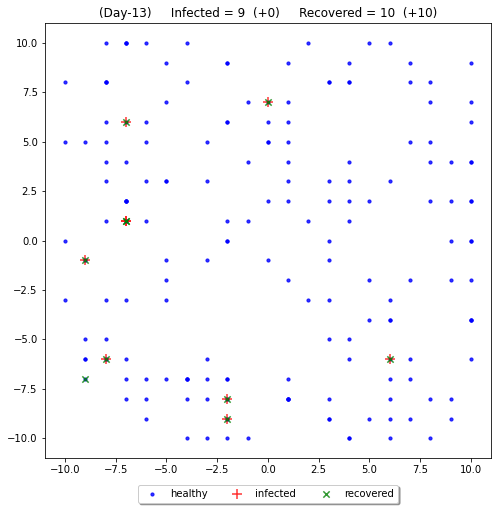

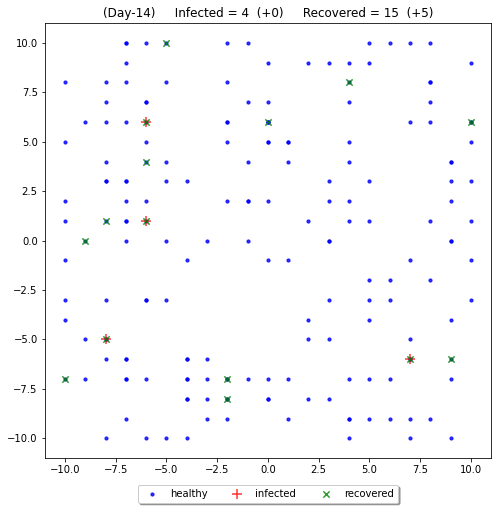

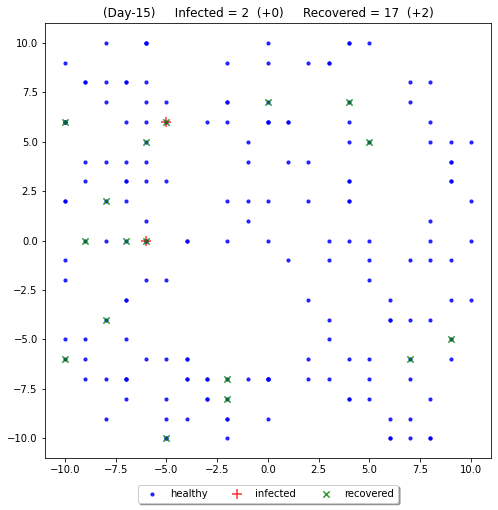

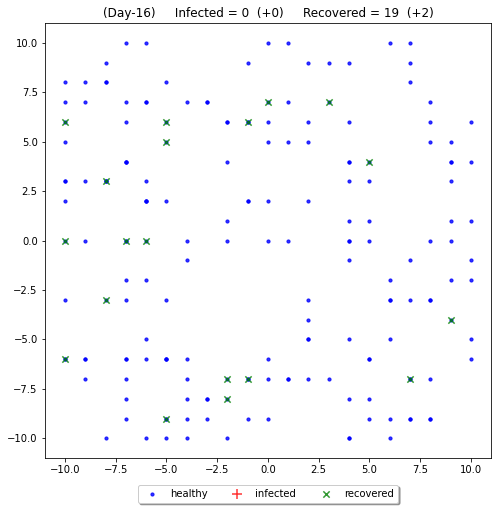

VIRUS OVER on Day-16
RECOVERED  19


In [0]:
# inisialisasi
n_individu = 200  #jumlah individu
r = 5/100         #ratio terinfeksi
p = 0.8           #probability individu bergerak
t_rec = 10        #waktu pemulihan

t = time.time()
# 
n_terinfeksi = int(n_individu * 5/100)
n_sehat = n_individu - n_terinfeksi

imun_stat = [0 for i in range(n_individu)]
waktu_infeksi = [0 for i in range(n_individu)]


health_stat= []
for i in range(n_terinfeksi):
  health_stat.append(1)
for i in range(n_sehat):
  health_stat.append(0)

#posisi awal
x_pos = [[randint(-10, 10) for i in range(n_individu)]]
y_pos = [[randint(-10, 10) for i in range(n_individu)]]


#ukuran ruang simulasi 20x20
x_max=10
x_min=-10
y_min=-10
y_max=10
x_range = x_max-x_min
y_range = y_max-y_min


#infected
x_infected = [] #sumbu x individu terinfeksi
y_infected = [] #sumbu y individu terinfeksi
i_infected = [] #menyimpan indeks individu terinfeksi dari list n_individu

#healthy
x_healthy = [] #sumbu x individu sehat
y_healthy = [] #sumbu y individu sehat
i_healthy = [] #menyimpan indeks individu sehat dari list n_individu

#healthy
x_recovered = [] #sumbu x individu sembuh
y_recovered = [] #sumbu y individu sembuh
i_recovered = [] #menyimpan indeks individu sembuh dari list n_individu

#inisialisasi posisi
i=0
while i < n_individu:
  if (health_stat[i] == 1): 
    x_infected.append(x_pos[0][i])
    y_infected.append(y_pos[0][i])
    i_infected.append(i)
  if (health_stat[i] == 0): 
    #individu sehat
    x_healthy.append(x_pos[0][i])
    y_healthy.append(y_pos[0][i])
    i_healthy.append(i)
  i+=1
visual(x_healthy,x_infected,x_recovered,y_healthy,y_infected, y_recovered, n_terinfeksi, 0,0,0,1)

i = 0
while n_terinfeksi>0: # i = hari
    inf = 0 #terinfeksi perhari
    sem = 0 #sembuh perhari
    x_pos.append([])
    y_pos.append([])
    
    for j in range(n_individu): #indfividu ke - j

        #update kesehatan
        
        if (health_stat[j] == 1):
            if (waktu_infeksi[j] <=t_rec):
              waktu_infeksi[j] +=1
            elif (waktu_infeksi[j] >t_rec): #sembuh
              sem +=1
              imun_stat[j] = 1
              health_stat[j] = 0
              n_terinfeksi -= 1
              x_recovered.append(x_pos[i][j])
              y_recovered.append(y_pos[i][j])
              i_recovered.append(j)
              temp = i_infected.index(j) #input index bervalue j 
              del i_infected[temp]
              del x_infected[temp]
              del y_infected[temp]

        #generate random number
        #posisi current/terakhir x dan y 
        curr_xpos = x_pos[i][j]
        curr_ypos = y_pos[i][j]

        #update position
        rand = rd.random()
        move = rd.random()
        
        #probabilitas individu 
        #bergerak 80% --> 0 sampai 0.8
        #diam 20% --> 0.81 sampai 1.0
        
        if(move>p): 
          x_pos[i+1].append(curr_xpos)
          y_pos[i+1].append(curr_ypos)
        else: 
          #kanan
          if rand <= 0.20:
              #periodic boundary condition
              if x_max <= curr_xpos:
                  #correction of x axis
                  x_pos[i+1].append(curr_xpos-x_range)
                  y_pos[i+1].append(curr_ypos)
              else:
                  x_pos[i+1].append(curr_xpos+1)
                  y_pos[i+1].append(curr_ypos)
          #bawah       
          elif rand <= 0.40:
              #periodic boundary condition
              if y_min >= curr_ypos:
                  #correction of y axis
                  y_pos[i+1].append(curr_ypos+y_range)
                  x_pos[i+1].append(curr_xpos)
              else:
                  y_pos[i+1].append(curr_ypos-1)
                  x_pos[i+1].append(curr_xpos)
          #kiri
          elif rand <= 0.60:
              #periodic boundary condition
              if x_min >= curr_xpos:
                  #correction of x axis
                  x_pos[i+1].append(curr_xpos+x_range)
                  y_pos[i+1].append(curr_ypos)
              else:
                  x_pos[i+1].append(curr_xpos-1)
                  y_pos[i+1].append(curr_ypos)
          #atas
          else:
              #periodic boundary condition
              if y_max <= curr_ypos:
                  #correction of y axis
                  y_pos[i+1].append(curr_ypos-y_range)
                  x_pos[i+1].append(curr_xpos)
              else:
                  y_pos[i+1].append(curr_ypos+1)
                  x_pos[i+1].append(curr_xpos)

        #update pos. recov
        for k in i_recovered: 
          if (k == j):
              temp = i_recovered.index(k)
              x_recovered[temp] = x_pos[i][temp]
              y_recovered[temp] = y_pos[i][temp]
        #update pos. healhy
        for k in i_healthy: 
          if (k == j):
              temp = i_healthy.index(k)
              x_healthy[temp] = x_pos[i][temp]
              y_healthy[temp] = y_pos[i][temp]
        #update pos. infec
        for k in i_infected: 
          if (k == j):
              temp = i_infected.index(k)
              x_infected[temp] = x_pos[i][temp]
              y_infected[temp] = y_pos[i][temp]
          #update terinfeksi 
          if ((x_pos[i][k] == x_pos[i][j]) and (y_pos[i][k] == y_pos[i][j]) 
          and (j!=k) and (i_infected[-1] < j)):
              x_infected.append(x_pos[i][j])
              y_infected.append(y_pos[i][j])
              i_infected.append(j)
              temp = i_healthy.index(j)
              del i_healthy[temp]
              del x_healthy[temp]
              del y_healthy[temp]
              health_stat[j] = 1
              n_terinfeksi+=1
              inf +=1

    i+=1
    day = i
    
    #plot
    visual(x_healthy,x_infected,x_recovered,y_healthy,y_infected, y_recovered, 
           n_terinfeksi, len(i_recovered),sem,inf,i+1 )

    
print('VIRUS OVER on'+' Day-'+str(day+1))
print('RECOVERED  '+str(imun_stat.count(1)))

In [0]:
from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob("*.png")
imgs.sort()

for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('plot.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

In [5]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('plot.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=500 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)